Any imports needed for statistical analysis

In [21]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Turn the dataframes into multiple lists: One for the likes of Trump tweets before the debate ended, one for the likes of Trump tweets after the debate ended, one for the likes of Biden tweets before the debate ended, one for the likes of Biden tweets after the debate ended.

In [22]:
df = pd.read_csv("..\DATA\debate_tweets_with_sentiment.csv")

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

cutoff_time = "2020-10-22 23:00:00"

filtered_df_trump_before = filtered_df_trump[filtered_df_trump['created_at'] < cutoff_time]
filtered_df_trump_after = filtered_df_trump[filtered_df_trump['created_at'] >= cutoff_time]

filtered_df_biden_before = filtered_df_biden[filtered_df_biden['created_at'] < cutoff_time]
filtered_df_biden_after = filtered_df_biden[filtered_df_biden['created_at'] >= cutoff_time]

print("Trump tweets before 11 PM:", len(filtered_df_trump_before))
print("Trump tweets after 11 PM:", len(filtered_df_trump_after))
print("Biden tweets before 11 PM:", len(filtered_df_biden_before))
print("Biden tweets after 11 PM:", len(filtered_df_biden_after))

filtered_df_trump_before_list = filtered_df_trump_before['likes'].tolist()
filtered_df_trump_after_list = filtered_df_trump_after['likes'].tolist()
filtered_df_biden_before_list = filtered_df_biden_before['likes'].tolist()
filtered_df_biden_after_list = filtered_df_biden_after['likes'].tolist()

print(filtered_df_trump_before_list)
print(filtered_df_trump_after_list)
print(filtered_df_biden_before_list)
print(filtered_df_biden_after_list)

Trump tweets before 11 PM: 41229
Trump tweets after 11 PM: 50708
Biden tweets before 11 PM: 28379
Biden tweets after 11 PM: 47086
[0.0, 305.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 3.0, 1.0, 9.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 7.0, 2.0, 0.0, 0.0, 26.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 381.0, 0.0, 0.0, 9.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 331.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 12.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 11.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0, 3.0, 7.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0

Function to conduct T-test

In [23]:
def perform_t_test(sentiment_before, sentiment_after):
    t_stat, p_value = stats.ttest_ind(sentiment_before, sentiment_after, equal_var=False)
    return t_stat, p_value

Run the T-test on the lists of likes

In [24]:
print(perform_t_test(filtered_df_trump_before_list, filtered_df_trump_after_list))
print(perform_t_test(filtered_df_biden_before_list, filtered_df_biden_after_list))

(-3.2708712384385294, 0.001072660378581379)
(-0.552990306713, 0.5802717811618678)


Turn the dataframes into multiple lists: One for the sentiment of Trump tweets before the debate ended, one for the sentiment of Trump tweets after the debate ended, one for the sentiment of Biden tweets before the debate ended, one for the sentiment of Biden tweets after the debate ended.

In [25]:
df = pd.read_csv("..\DATA\debate_tweets_with_sentiment.csv")

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

cutoff_time = "2020-10-22 23:00:00"

filtered_df_trump_before = filtered_df_trump[filtered_df_trump['created_at'] < cutoff_time]
filtered_df_trump_after = filtered_df_trump[filtered_df_trump['created_at'] >= cutoff_time]

filtered_df_biden_before = filtered_df_biden[filtered_df_biden['created_at'] < cutoff_time]
filtered_df_biden_after = filtered_df_biden[filtered_df_biden['created_at'] >= cutoff_time]

print("Trump tweets before 11 PM:", len(filtered_df_trump_before))
print("Trump tweets after 11 PM:", len(filtered_df_trump_after))
print("Biden tweets before 11 PM:", len(filtered_df_biden_before))
print("Biden tweets after 11 PM:", len(filtered_df_biden_after))

nlp_trump_before_list = filtered_df_trump_before['Compound_Score'].tolist()
nlp_trump_after_list = filtered_df_trump_after['Compound_Score'].tolist()
nlp_biden_before_list = filtered_df_biden_before['Compound_Score'].tolist()
nlp_biden_after_list = filtered_df_biden_after['Compound_Score'].tolist()

print(nlp_trump_before_list)
print(nlp_trump_after_list)
print(nlp_biden_before_list)
print(nlp_biden_after_list)

Trump tweets before 11 PM: 41229
Trump tweets after 11 PM: 50708
Biden tweets before 11 PM: 28379
Biden tweets after 11 PM: 47086
[0.0, 0.0, 0.0, 0.0, -0.296, -0.34, -0.5859, 0.6705, 0.0, 0.0, -0.3724, 0.128, 0.5267, 0.0, 0.0, 0.0, 0.0, 0.1533, -0.4939, -0.6506, 0.4939, 0.3818, 0.8567, 0.0, 0.0, 0.1779, -0.7783, 0.3612, -0.3941, -0.7149, 0.1531, 0.0, -0.4588, -0.6597, 0.8158, 0.0, 0.5473, -0.7964, -0.594, 0.0356, 0.0, 0.0, 0.6135, 0.7096, 0.0, 0.3612, 0.0, -0.2023, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8625, -0.3818, 0.4019, -0.3875, 0.2759, 0.0, 0.0, 0.0, 0.5106, 0.5407, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.8126, 0.0, 0.0, -0.3355, 0.0, 0.0, 0.0, 0.5859, -0.5255, -0.4412, 0.0, 0.0, 0.7482, 0.0, -0.5588, -0.0772, 0.5067, 0.0, -0.6184, -0.0823, -0.2023, -0.6597, 0.6597, -0.4767, 0.1531, 0.0, -0.7322, -0.4023, 0.0, 0.0, -0.5849, 0.6486, 0.5983, 0.0, 0.0, 0.4215, 0.0, 0.1007, -0.6249, 0.0, -0.2732, 0.7096, 0.0, -0.3956, -0.1027, -0.3612, 0.0, 0.0, 0.5473, 0.5413, 0.4404, -0.6588, -0.8807

Histograms of sentiment for each of the lists.

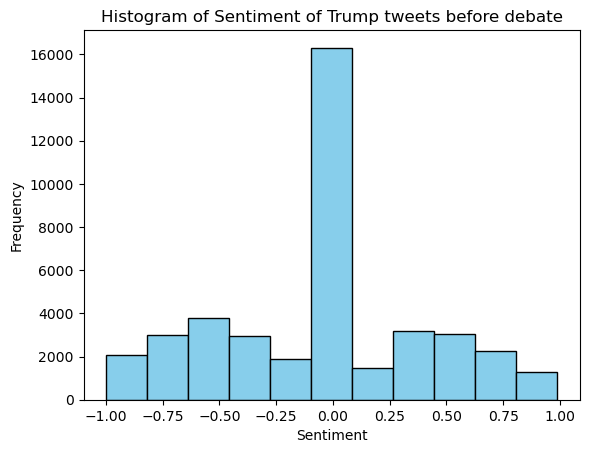

In [32]:
data = nlp_trump_before_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Trump tweets before debate')
plt.show()

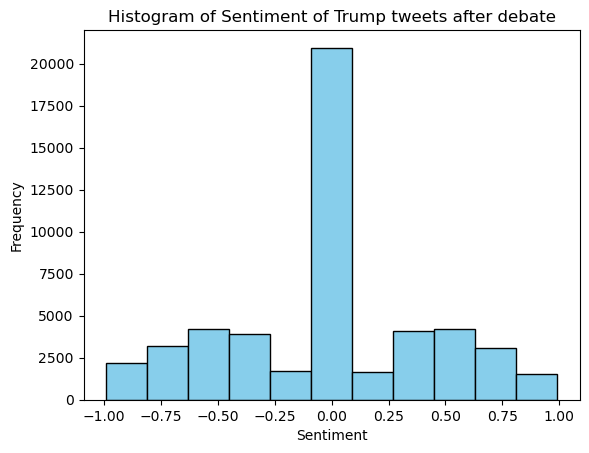

In [36]:
data = nlp_trump_after_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Trump tweets after debate')
plt.show()

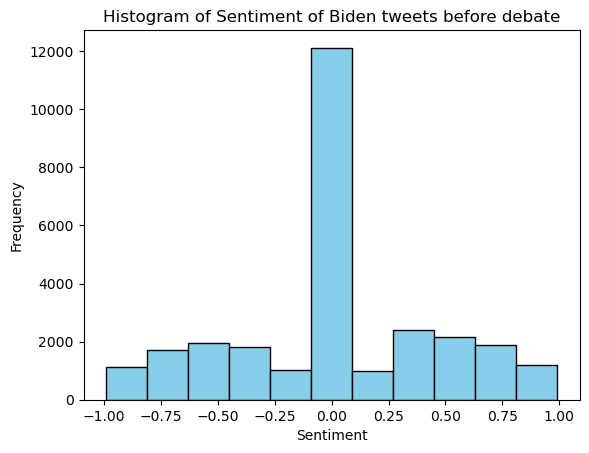

In [35]:
data = nlp_biden_before_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Biden tweets before debate')
plt.show()

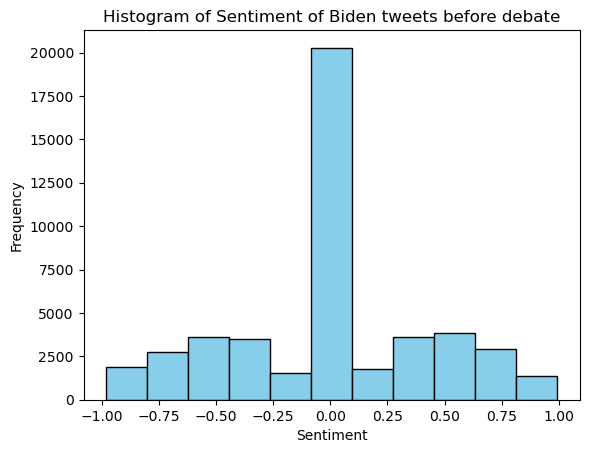

In [34]:
data = nlp_biden_after_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Biden tweets before debate')
plt.show()

Conduct the T-test on sentiment list

In [20]:
avg_biden_before = sum(nlp_biden_before_list)/len(nlp_biden_before_list)
avg_biden_after = sum(nlp_biden_after_list)/len(nlp_biden_after_list)
avg_trump_before = sum(nlp_trump_before_list)/len(nlp_trump_before_list)
avg_trump_after = sum(nlp_trump_after_list)/len(nlp_trump_after_list)

print("Average Biden Before:", avg_biden_before)
print("Average Biden After:", avg_biden_after)
print("Average Trump Before:", avg_trump_before)
print("Average Trump After:", avg_trump_after)

t_stat_biden, p_value_biden = perform_t_test(nlp_biden_before_list, nlp_biden_after_list)
t_stat_trump, p_value_trump = perform_t_test(nlp_trump_before_list, nlp_trump_after_list)

print(t_stat_biden, p_value_biden)
print(t_stat_trump, p_value_trump)

Average Biden Before: 0.018526568941823425
Average Biden After: 0.0025925944017330875
Average Trump Before: -0.04178603167673248
Average Trump After: -0.011748698430227807
4.868269637848884 1.128719858429446e-06
-10.183971306564702 2.412673491902754e-24
